In [1]:
import sys
sys.path.append("..")

In [2]:
from PIL import Image
import albumentations as A
import numpy as np

In [3]:
def to_PIL(image_np):
    return Image.fromarray(image_np)

In [4]:
def display_PIL(transformed):
    display(to_PIL(transformed["image"]))
    display(to_PIL(transformed["mask"]))

In [5]:
image = Image.open("../dataset/images/image_1.tif")
mask = Image.open("../dataset/masks/mask_1.tif")

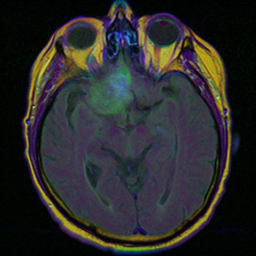

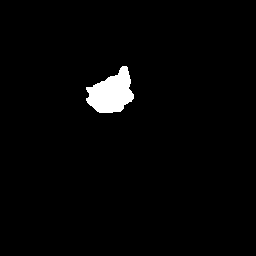

In [6]:
display(image)
display(mask)

## Kompozycja augumentacji użyta w projekcie

```python
A.Compose(
        [
            A.Flip(p=0.2),
            A.NoOp(),
            A.Perspective(keep_size=True, p=0.2),
            A.RandomRotate90(p=0.2),
            A.Transpose(p=0.2)
        ]
    )
```

### Flip
https://github.com/albumentations-team/albumentations/blob/master/albumentations/augmentations/transforms.py#L322  
  
  
Odwraca zdjęcie w poziomie, w pionie lub w obu kierunkach na raz.

In [7]:
image_np = np.array(image)
mask_np = np.array(mask)

In [8]:
flip = A.Flip(p=1.0)

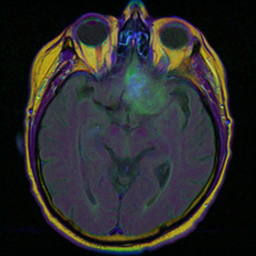

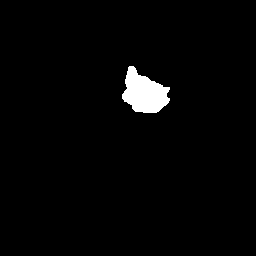

In [9]:
flipped = flip(image=image_np, mask=mask_np)
display_PIL(flipped)

### NoOp
https://github.com/albumentations-team/albumentations/blob/master/albumentations/core/transforms_interface.py#L253  
  
  
Transformacja nie robi nic. Zwraca to samo zdjęcie, które zostało do niej przekazane.  
W trakcie wyboru augumentacji stwierdziliśmy, że to zabawne i będzie to dodatkowy element kompozycji.

In [10]:
image_np = np.array(image)
mask_np = np.array(mask)

In [11]:
noop = A.NoOp()

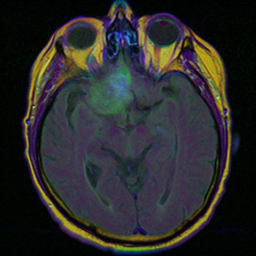

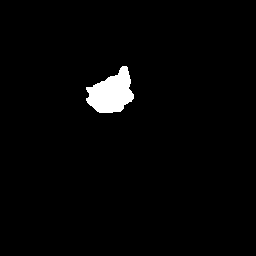

In [12]:
nooped = noop(image=image_np, mask=mask_np)
display_PIL(nooped)

### Perspective
https://github.com/albumentations-team/albumentations/blob/master/albumentations/augmentations/geometric/transforms.py#L215  
  
  
Nakłada losową transformację perspektywy 4-punktowej. Dodatkowo dzięki `keep_size=True` wyjściowe zdjęcie ma taki sam rozmiar jak wejściowy.

In [13]:
image_np = np.array(image)
mask_np = np.array(mask)

In [14]:
perspective = A.Perspective(keep_size=True, p=1.0)

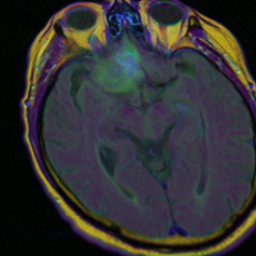

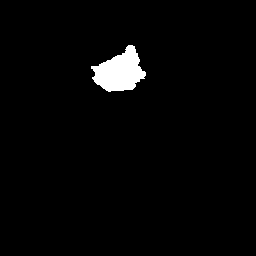

In [15]:
perspectived = perspective(image=image_np, mask=mask_np)
display_PIL(perspectived)

### RandomRotate90
https://github.com/albumentations-team/albumentations/blob/master/albumentations/augmentations/geometric/rotate.py#L12  
  
  
Obraca wejściowy obraz o wielokrotność kąta $90$ stopni.

In [16]:
image_np = np.array(image)
mask_np = np.array(mask)

In [17]:
random_rotate = A.RandomRotate90(p=1.0)

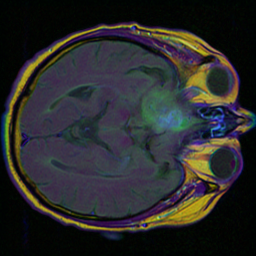

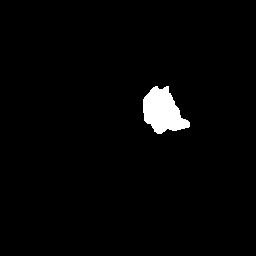

In [22]:
random_rotated = random_rotate(image=image_np, mask=mask_np)
display_PIL(random_rotated)

### Transpose
https://github.com/albumentations-team/albumentations/blob/master/albumentations/augmentations/transforms.py#L357  
  
  
Przeprowadza transpozycję zdjęcia wejściowego.

In [19]:
image_np = np.array(image)
mask_np = np.array(mask)

In [20]:
transpose = A.Transpose(p=1.0)

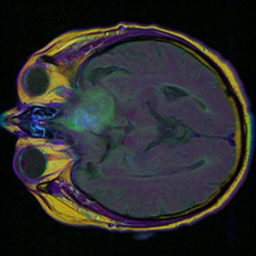

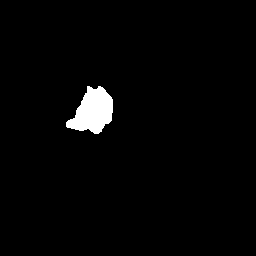

In [21]:
transposed = transpose(image=image_np, mask=mask_np)
display_PIL(transposed)